# Polyphonic Pitch Detection

Multiheaded model for polyphonic pitch detection.

In [1]:
%matplotlib inline

# Setup autoreload for local modules, otherwise Jupyter caches modules
# on first load. Add new local modules here if necessary.
%load_ext autoreload
%autoreload 2
%aimport deepsamples, helpers, gen_chord_samples, gen_note_samples

# To use specific version
# %pip install --user tensorflow==2.1

Using TensorFlow backend.


# Generate Samples (Option 1)

Download dependencies and generate samples here. Alternatively you can download the pre-generated samples from the next step.

In [2]:
# Onetime Setup
%pip install midiutil
!sudo apt-get -y install sox fluidsynth
!wget --no-check-certificate https://muthanna.com/deepears/soundfont.sf2

Note: you may need to restart the kernel to use updated packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.6-4).
sox is already the newest version (14.4.1-5+deb9u2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
--2020-03-23 12:33:24--  https://muthanna.com/deepears/soundfont.sf2
Resolving muthanna.com (muthanna.com)... 35.244.227.152
Connecting to muthanna.com (muthanna.com)|35.244.227.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31281186 (30M) [application/octet-stream]
Saving to: ‘soundfont.sf2.1’

soundfont.sf2.1     100%[===================>]  29.83M  60.7MB/s    in 0.5s    

2020-03-23 12:33:25 (60.7 MB/s) - ‘soundfont.sf2.1’ saved [31281186/31281186]



In [7]:
!rm -rf samples
!mkdir -p samples
from gen_chord_samples import gen_polyphonic_samples

from IPython.utils import io

gen_polyphonic_samples(1000)

[============================================================] 1000/1000

In [11]:
!find samples | wc -l
!sox --i samples/A2-P0-minor-i0-110.000-S0-V0.29-noreject-attack.wav

14996
sox FAIL formats: can't open input file `samples/A2-P0-minor-i0-110.000-S0-V0.29-noreject-attack.wav': No such file or directory


### Upload samples to Storage Bucket

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [9]:
!rm samples.zip; zip -q -r samples.zip samples
!ls -lh samples.zip

-rw-r--r-- 1 jupyter jupyter 389M Mar 18 13:25 samples.zip


In [ ]:
!gsutil -h "Cache-control:public,max-age=86400" -m cp -a public-read samples.zip gs://muthanna.com/deepears/poly-samples-v1.zip

# Download Samples (Option 2)

In [12]:
!wget --no-check-certificate https://muthanna.com/deepears/poly-samples-v1.zip
!rm -rf samples
!unzip -q poly-samples-v1.zip
!ls -l samples/ | wc -l
!ls -l samples | head

--2020-03-18 13:31:50--  https://muthanna.com/deepears/poly-samples-v1.zip
Resolving muthanna.com (muthanna.com)... 35.244.227.152
Connecting to muthanna.com (muthanna.com)|35.244.227.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407010587 (388M) [application/zip]
Saving to: ‘poly-samples-v1.zip’

poly-samples-v1.zip 100%[===================>] 388.16M  57.9MB/s    in 6.6s    

2020-03-18 13:31:57 (58.9 MB/s) - ‘poly-samples-v1.zip’ saved [407010587/407010587]

14996
total 479840
-rw-r--r-- 1 jupyter jupyter 32044 Mar 18 13:12 poly--P0-N:A2-425.000-S-15-V0.43-noreject-full.wav
-rw-r--r-- 1 jupyter jupyter 32044 Mar 18 13:08 poly--P0-N:A2-440.000-S0-V0.25-noreject-full.wav
-rw-r--r-- 1 jupyter jupyter 32044 Mar 18 13:12 poly--P0-N:A2-440.000-S0-V0.94-noreject-full.wav
-rw-r--r-- 1 jupyter jupyter 32044 Mar 18 13:08 poly--P0-N:A2-448.000-S8-V0.98-noreject-full.wav
-rw-r--r-- 1 jupyter jupyter 32044 Mar 18 13:08 poly--P0-N:A2-453.000-S13-V0.44-noreject-full.

# Config and Setup

In [2]:
import os
files = os.listdir("samples")
print(len(files))
print(("\n").join(files[:5]))

14995
poly--P56-N:Cs3:E3:B2:C4:G6:Gs3-416.000-S-24-V0.42-noreject-full.wav
poly--P26-N:Cs2-464.000-S24-V0.63-noreject-full.wav
poly--P48-N:F5:G3-419.000-S-21-V0.78-noreject-full.wav
poly--P66-N:F4-412.000-S-28-V0.76-noreject-full.wav
poly--P78-N:G4:Cs5:G2:Fs6:G5-439.000-S-1-V0.75-noreject-full.wav


In [3]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython import display

import helpers
from helpers import Config
from deepsamples import PolySamples

Spectrogram for samples/poly--P0-N:B2-428.000-S-12-V0.38-noreject-full.wav
(513, 59)


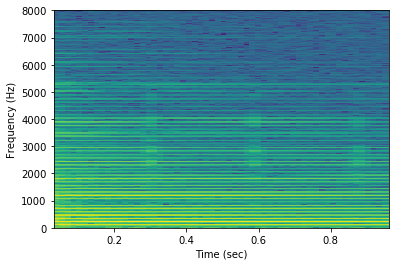

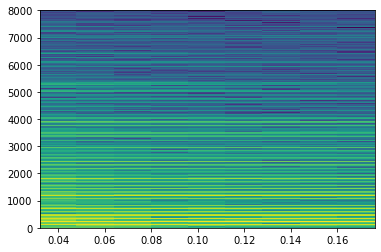

In [4]:
import os
import random

config = Config(
    rows=513,
    cols = 59,
    s_nperseg = 1024,
    s_nfft = 1024,
    s_noverlap = 768,
    log_scale = True,
    clip_magnitude_quantile=0.25,
    resample = 16000)

f, t, Sxx = helpers.spectrogram_from_file("samples/"+files[random.randint(0, len(files))], config=config)
plt.show()
plt.pcolormesh(t[0:10], f, np.log(np.abs(Sxx[:,0:10])))
plt.show()

Initializing DeepSamples:PolySamples...
rows: 513, cols: 59, windows_per_file: 10
Loading sample files...
Shuffling samples...
Generating spectrograms...


[============================================================] 10/10

Normalizing data...
Samples ready.
xs: (100, 513, 10), ys: (100, 60)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
poly--P30-N:E3:Cs4:D3:As5:E6:Gs4-440.000-S0-V0.39-noreject-full.wav
Tunings: [array([440.]), array([440.]), array([440.]), array([440.]), array([440.]), array([440.]), array([440.]), array([440.]), array([440.]), array([440.])]
Ys: [['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6'], ['D3', 'E3', 'Cs4', 'Gs4', 'As5', 'E6']]


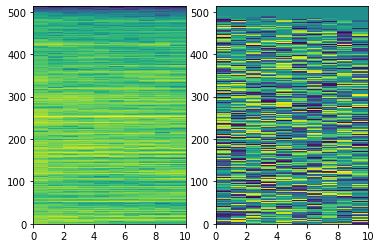

In [5]:
samples = PolySamples(num_files=10, config=config)
samples.load()
print("xs: %s, ys: %s" % (samples.mags.shape, samples.ys.shape))

example = 0
example_indices = list(range(example * samples.windows_per_file, (example * samples.windows_per_file) + samples.windows_per_file))
print(example_indices)

print(samples.files[example])
print("Tunings:", [samples.tunings[example_indices[i]] for i in range(samples.windows_per_file)])
print("Ys:", [samples.vector_to_notes(samples.ys[example_indices[i]]) for i in range(samples.windows_per_file)])

plt.subplot(1, 2, 1)
plt.pcolormesh(samples.mags[example * samples.windows_per_file])
plt.subplot(1, 2, 2)
plt.pcolormesh(samples.phases[example * samples.windows_per_file])

In [6]:
def plot_history(history):
  for k in history.history:
    vals = history.history[k]
    
    if k.endswith("loss"):
        plt.plot(vals, label=k)

  plt.legend()
  plt.figure()
    
  for k in history.history:
    vals = history.history[k]
    
    if k.endswith("accuracy"):
        plt.plot(vals, label=k)

  plt.legend()
  plt.show()

# Models

In [7]:
import re
import sys
import os

import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

## Multiheaded Model

This model has two inputs and two outputs. Magnitudes are run through a conv layer, and Phases through an RNN. Extracted features are sent to two dense layers, one emitting chords, and the other roots.

Initializing DeepSamples:PolySamples...
rows: 513, cols: 59, windows_per_file: 10
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mags (InputLayer)               [(None, 513, 10)]    0                                            
_______________________________________________________________________________

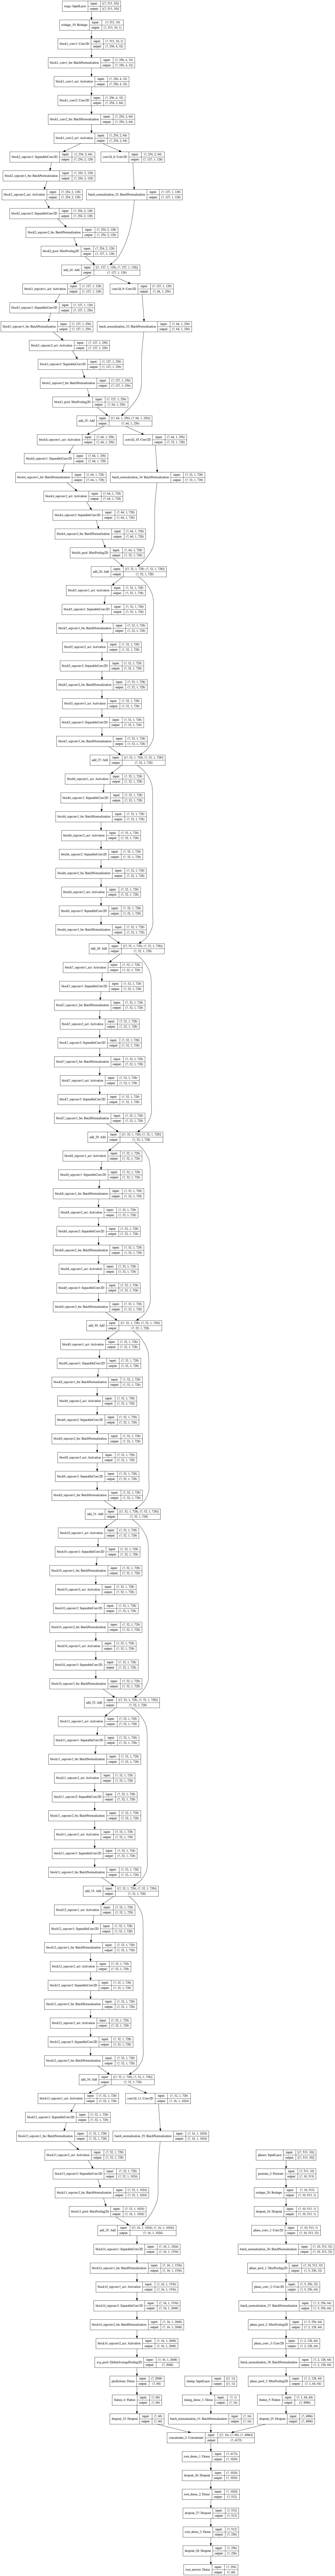

In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.xception import Xception

def build_model(rows, cols, num_classes=60, xception=False):
    tuning_input = layers.Input(shape=(1), name='tuning')
    mags_input = layers.Input(shape=(rows, cols), name='mags')
    phases_input = layers.Input(shape=(rows, cols), name='phases')

    tuning_layers = layers.Dense(16, activation='relu', name='tuning_dense_1')(tuning_input)
    tuning_layers = layers.BatchNormalization()(tuning_layers)

    mag_layers = layers.Reshape((rows, cols, 1))(mags_input)
    if xception:
        x_model = Xception(input_tensor=mag_layers, weights=None, include_top=True, classes=num_classes)
        mag_layers = x_model.output
        mag_layers = layers.Flatten()(mag_layers)
        mag_layers = layers.Dropout(0.2)(mag_layers)
    else:
        mag_layers = layers.Conv2D(32, (3,3), padding="same", activation='relu', name="mag_conv_1_1")(mag_layers)
        mag_layers = layers.Conv2D(32, (3,3), padding="same", activation='relu', name="mag_conv_1_1b")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.Conv2D(32, (3,3), padding="same", activation='relu', name="mag_conv_1_2")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.MaxPooling2D(pool_size=(2,2), name="mag_pool_1")(mag_layers)
        mag_layers = layers.Dropout(0.2)(mag_layers)

        mag_layers = layers.Conv2D(64, (3,3), padding="same", activation='relu', name="mag_conv_2_1")(mag_layers)
        mag_layers = layers.Conv2D(64, (3,3), padding="same", activation='relu', name="mag_conv_2_1b")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.Conv2D(64, (3,3), padding="same", activation='relu', name="mag_conv_2_2")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.MaxPooling2D(pool_size=(2,2), name="mag_pool_2")(mag_layers)
        mag_layers = layers.Dropout(0.2)(mag_layers)

        mag_layers = layers.Conv2D(128, (3,3), padding="same", activation='relu', name="mag_conv_3_1")(mag_layers)
        mag_layers = layers.Conv2D(128, (3,3), padding="same", activation='relu', name="mag_conv_3_1b")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.Conv2D(128, (3,3), padding="same", activation='relu', name="mag_conv_3_2")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.MaxPooling2D(pool_size=(2,2), name="mag_pool_3")(mag_layers)
        mag_layers = layers.Dropout(0.2)(mag_layers)

        mag_layers = layers.Conv2D(256, (3,3), padding="same", activation='relu', name="mag_conv_4_1")(mag_layers)
        mag_layers = layers.Conv2D(256, (3,3), padding="same", activation='relu', name="mag_conv_4_1b")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.Conv2D(256, (3,3), padding="same", activation='relu', name="mag_conv_4_2")(mag_layers)
        mag_layers = layers.BatchNormalization()(mag_layers)
        mag_layers = layers.Flatten()(mag_layers)
        mag_layers = layers.Dropout(0.2)(mag_layers)

    phase_layers = layers.Permute((2, 1))(phases_input)
    phase_layers = layers.Reshape((cols, rows, 1))(phase_layers)
    phase_layers = layers.Dropout(0.5)(phase_layers)
    phase_layers = layers.Conv2D(32, (3,3), padding="same", activation='relu', name="phase_conv_1")(phase_layers)
    phase_layers = layers.BatchNormalization()(phase_layers)
    phase_layers = layers.MaxPooling2D(pool_size=(2,2), name="phase_pool_1")(phase_layers)
    phase_layers = layers.Conv2D(64, (3,3), padding="same", activation='relu', name="phase_conv_2")(phase_layers)
    phase_layers = layers.BatchNormalization()(phase_layers)
    phase_layers = layers.MaxPooling2D(pool_size=(2,2), name="phase_pool_2")(phase_layers)
    phase_layers = layers.Conv2D(64, (3,3), padding="same", activation='relu', name="phase_conv_3")(phase_layers)
    phase_layers = layers.BatchNormalization()(phase_layers)
    phase_layers = layers.MaxPooling2D(pool_size=(2,2), name="phase_pool_3")(phase_layers)
    phase_layers = layers.Flatten()(phase_layers)
    phase_layers = layers.Dropout(0.2)(phase_layers)

    concatenated = layers.concatenate([tuning_layers, mag_layers, phase_layers])

    root_layers = layers.Dense(1024, activation='relu', name='root_dense_1')(concatenated)
    root_layers = layers.Dropout(0.3)(root_layers)
    root_layers = layers.Dense(512, activation='relu', name='root_dense_2')(root_layers)
    root_layers = layers.Dropout(0.2)(root_layers)
    root_layers = layers.Dense(256, activation='relu', name='root_dense_3')(root_layers)
    root_layers = layers.Dropout(0.2)(root_layers)
    root_answer = layers.Dense(num_classes, activation='sigmoid', name='root_answer')(root_layers)

    return tf.keras.models.Model([tuning_input, mags_input, phases_input], [root_answer])

dummy_samples = PolySamples(num_files=10, config=config)
rows = dummy_samples.rows
cols = dummy_samples.cols

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    model = build_model(rows, cols, num_classes=len(dummy_samples.note_classes), xception=True)
    optimizer = tf.keras.optimizers.Adam(amsgrad=True)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True, )
display.display(display.Image("model.png"))

In [ ]:
total_files = 12000
total_samples = total_files * dummy_samples.windows_per_file
training_samples = int(total_samples * 0.8)
print("files: %d, total_samples: %d, training_samples: %d" % (total_files, total_samples, training_samples))

prod_samples = PolySamples(num_files=total_files, config=config)
prod_samples.load()

print("mags: %s, phases: %s, tunings: %s, ys: %s" % (prod_samples.mags.shape, prod_samples.phases.shape, prod_samples.tunings.shape, prod_samples.ys.shape))

files: 12000, total_samples: 120000, training_samples: 96000
Initializing DeepSamples:PolySamples...
rows: 513, cols: 59, windows_per_file: 10
Loading sample files...
Shuffling samples...
Generating spectrograms...


[=====                                                       ] 1100/12000

In [16]:
history = model.fit([prod_samples.tunings[:training_samples], prod_samples.mags[:training_samples], prod_samples.phases[:training_samples]], [prod_samples.ys[:training_samples]], epochs=5, batch_size=256, validation_split=0.1)
plot_history(history)

INFO:tensorflow:batch_all_reduce: 64 all-reduces with algorithm = nccl, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:batch_all_reduce: 64 all-reduces with algorithm = nccl, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
86400/86400 [==============================] - 378s 4ms/sample - loss: 0.1932 - accuracy: 0.9402 - val_loss: 0.3320 - val_accuracy: 0.9408
Epoch 2/25
86400/86400 [==============================] - 214s 2ms/sample - loss: 0.1169 - accuracy: 0.9579 - val_loss: 0.1814 - val_accuracy: 0.9474
Epoch 3/25
86400/86400 [==============================] - 214s 2ms/sample - loss: 0.0629 - accuracy: 0.9767 - val_loss: 0.1300 - val_accuracy: 0.9574
Epoch 4/25
86400/86400 [==============================] - 214s 2ms/sample - loss: 0.0350 - accuracy: 0.9871 - val_loss: 0.1296 - val_accuracy: 0.9595
Epoch 5/25
86400/86400 [==============================] - 214s 2ms/sample - loss: 0.0225 - accuracy: 0.9919

KeyboardInterrupt: 

In [ ]:
threshold = 0.3
predictions = model.predict([prod_samples.tunings[training_samples:], prod_samples.mags[training_samples:], prod_samples.phases[training_samples:]])
predictions[predictions>=threshold] = 1
predictions[predictions<threshold] = 0
labels = prod_samples.ys[training_samples:]

# y_predictions = np.argmax(predictions, axis=-1)
# plt.matshow(tf.math.confusion_matrix(y_predictions, labels))

In [23]:
start = 500
for i in range(start, start+100, 10):
    print(prod_samples.tunings[training_samples + i], prod_samples.vector_to_notes(predictions[i]), prod_samples.vector_to_notes(labels[i]))


[456.] [] ['D4', 'Gs5']
[428.] ['D2', 'G3', 'F4', 'A5', 'B5'] ['D2', 'G3', 'F4', 'A5', 'B5']
[420.] ['F2', 'Fs2', 'Fs3', 'As3', 'G6'] ['F2', 'E3', 'Fs3', 'As3', 'B4', 'G6']
[440.] ['D5'] ['G2', 'D5']
[432.] [] ['Gs2']
[440.] ['A3'] ['As3']
[468.] ['E5'] ['Ds2', 'Ds3', 'G3', 'B3', 'E6']
[415.] [] ['Cs2', 'C5', 'A5', 'Gs6']
[440.] ['As2'] ['Fs2', 'B3']
[440.] ['C3', 'Ds3', 'Gs4', 'C5', 'Ds5', 'D6', 'Gs6'] ['C3', 'Ds3', 'Gs4', 'C5', 'Ds5', 'D6', 'Gs6']


(1, 513, 10, 32)


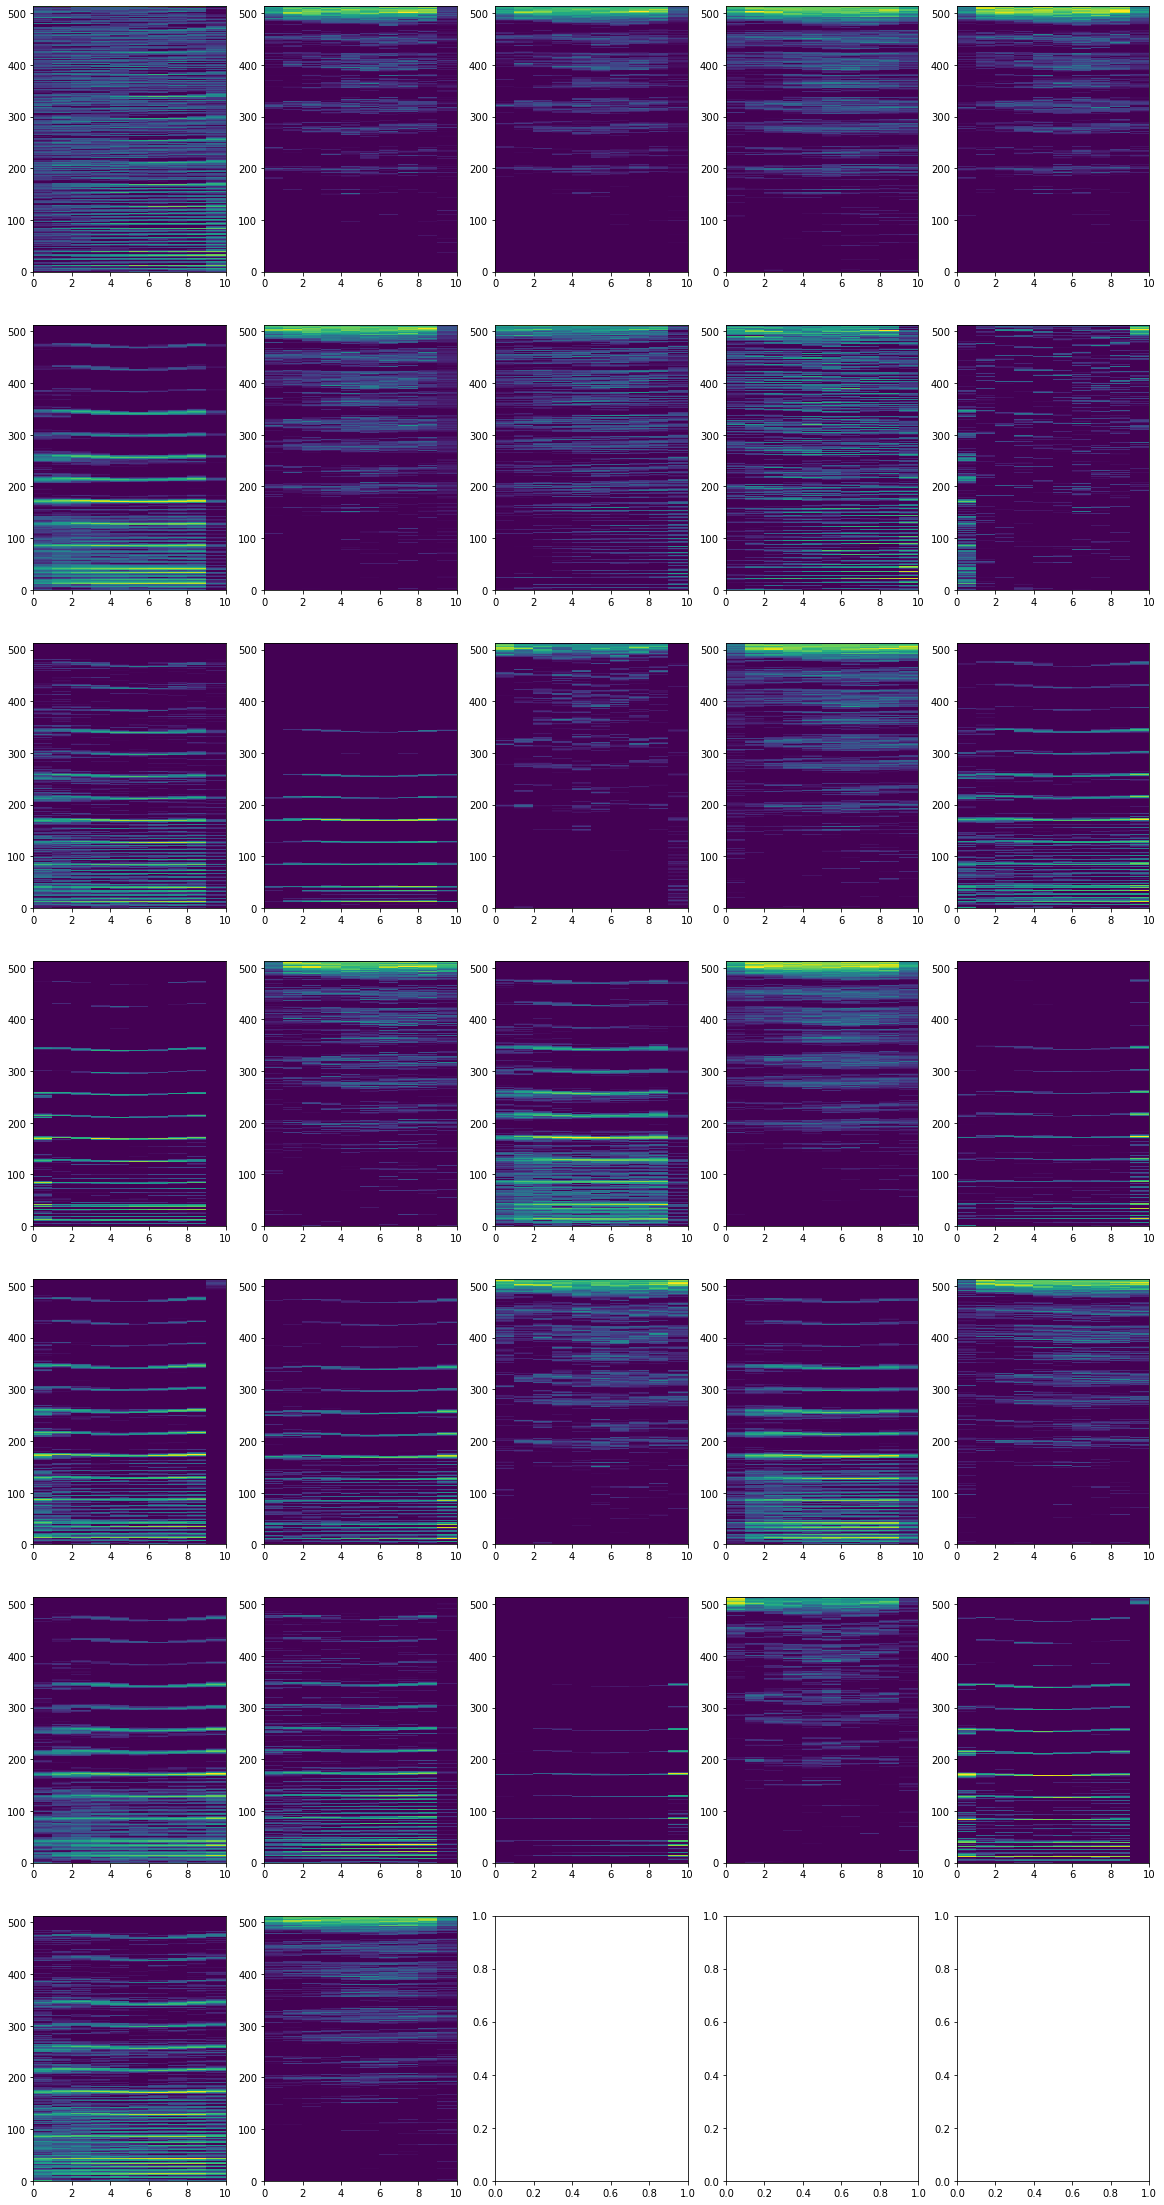

In [85]:
def visualize_filters(layer_num, count, x, model=model):
  layer = model.get_layer(index=layer_num)
  layer_output=layer.output
  
  intermediate_model=tf.keras.models.Model(inputs=model.inputs,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(x)

  col_size=5
  row_size=int(count / col_size) + 1
  
  print(np.shape(intermediate_prediction))
  fig,ax=plt.subplots(row_size,col_size,figsize=(20,40))

  img_index=0
  row=0
  col=0
  while img_index < count:
    ax[row][col].pcolormesh(intermediate_prediction[0, :, :, img_index])
    img_index=img_index+1
    col += 1
    if col >= col_size:
      col = 0
      row +=1
    if img_index > count: break

visualize_filters(6, 32, x=[prod_samples.tunings[0], prod_samples.mags[0].reshape(1, rows, cols), prod_samples.phases[0].reshape(1, rows, cols)])

mags: 10 (1, 513, 10)
phases: 10 (1, 513, 10)
reshape_3: 1 (1, 513, 10, 1)
permute_1: 513 (1, 10, 513)
dropout_10: 1 (1, 513, 10, 1)
reshape_4: 1 (1, 10, 513, 1)
mag_conv_1: 32 (1, 513, 10, 32)
dropout_13: 1 (1, 10, 513, 1)
batch_normalization_9: 32 (1, 513, 10, 32)
phase_conv_1: 32 (1, 10, 513, 32)
mag_pool_1: 32 (1, 256, 5, 32)
batch_normalization_12: 32 (1, 10, 513, 32)
dropout_11: 32 (1, 256, 5, 32)
phase_pool_1: 32 (1, 5, 256, 32)
mag_conv_2: 64 (1, 256, 5, 64)
phase_conv_2: 64 (1, 5, 256, 64)
batch_normalization_10: 64 (1, 256, 5, 64)
batch_normalization_13: 64 (1, 5, 256, 64)
mag_pool_2: 64 (1, 128, 2, 64)
phase_pool_2: 64 (1, 2, 128, 64)
mag_conv_3: 128 (1, 128, 2, 128)
phase_conv_3: 128 (1, 2, 128, 128)
batch_normalization_11: 128 (1, 128, 2, 128)
batch_normalization_14: 128 (1, 2, 128, 128)
tuning: 1 (1, 1)
mag_pool_3: 128 (1, 64, 1, 128)
phase_pool_3: 128 (1, 1, 64, 128)
tuning_dense_1: 64 (1, 64)
flatten_2: 8192 (1, 8192)
flatten_3: 8192 (1, 8192)
batch_normalization_8: 64 

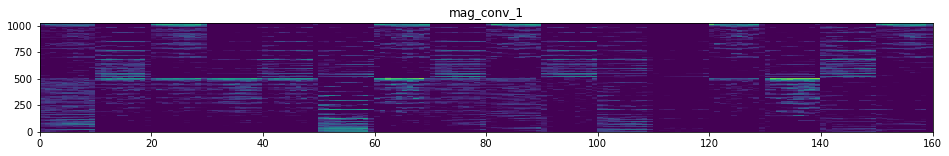

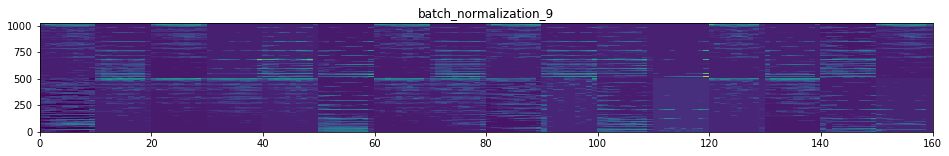

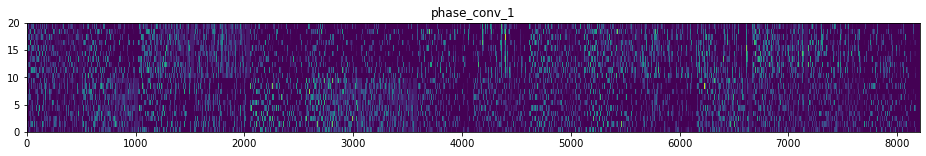

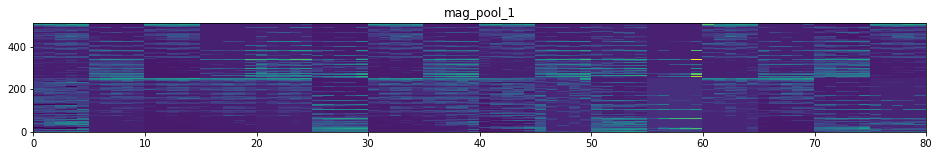

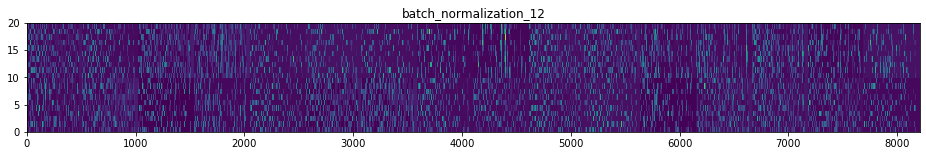

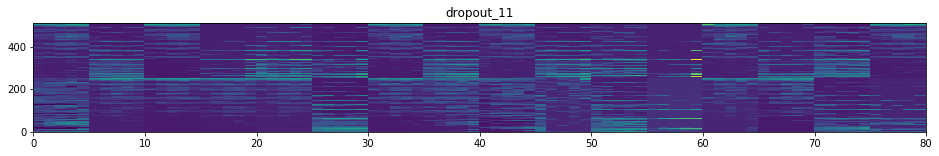

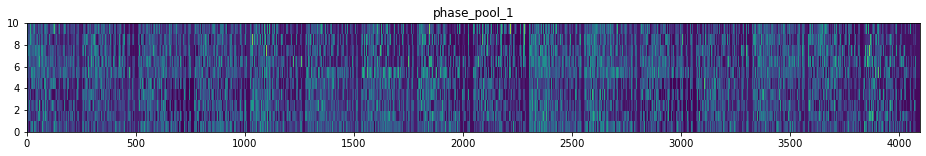

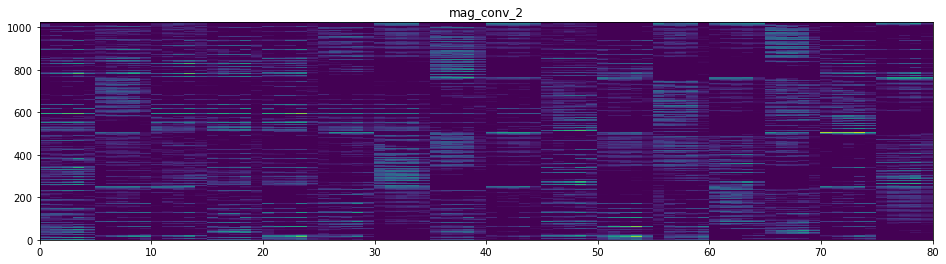

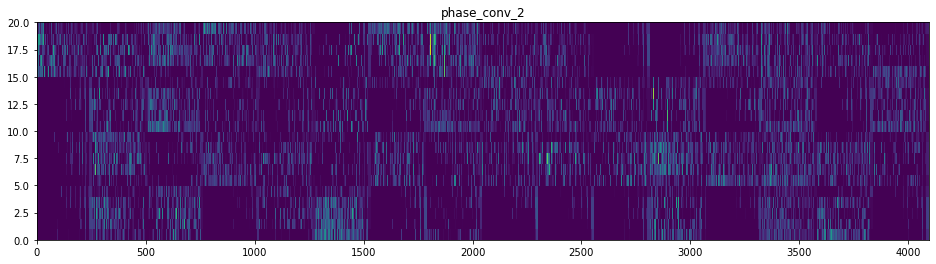

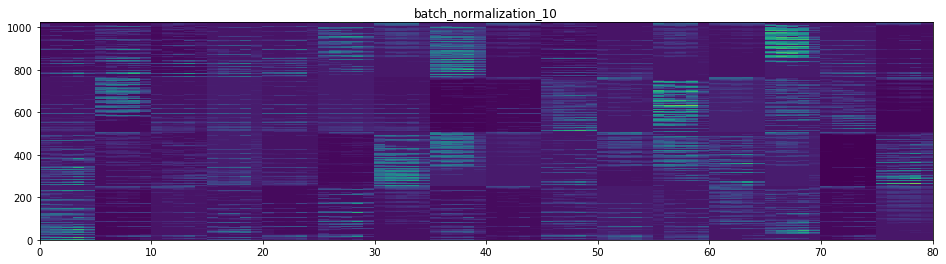

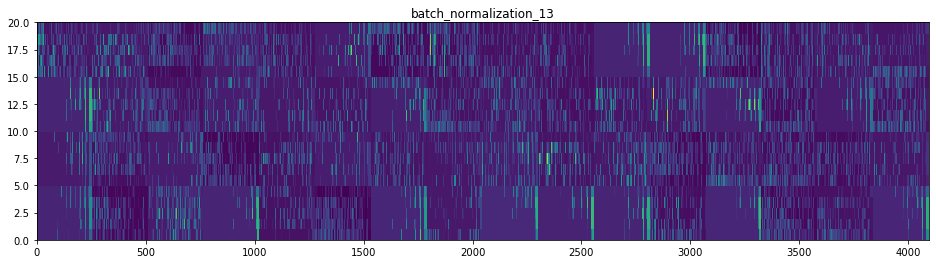

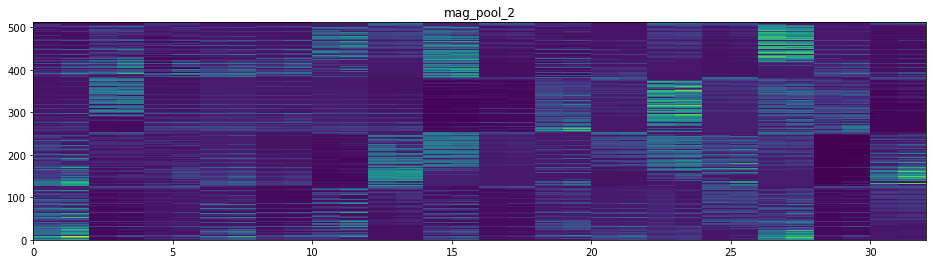

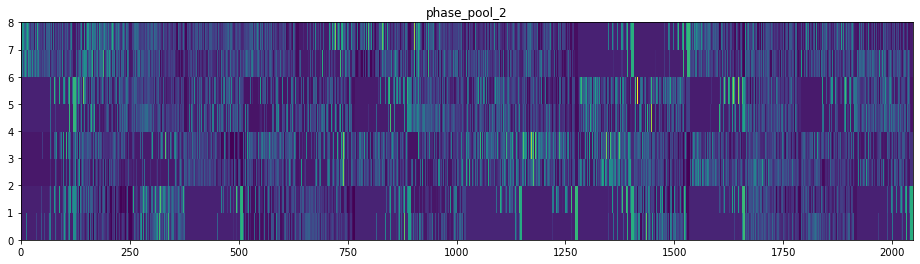

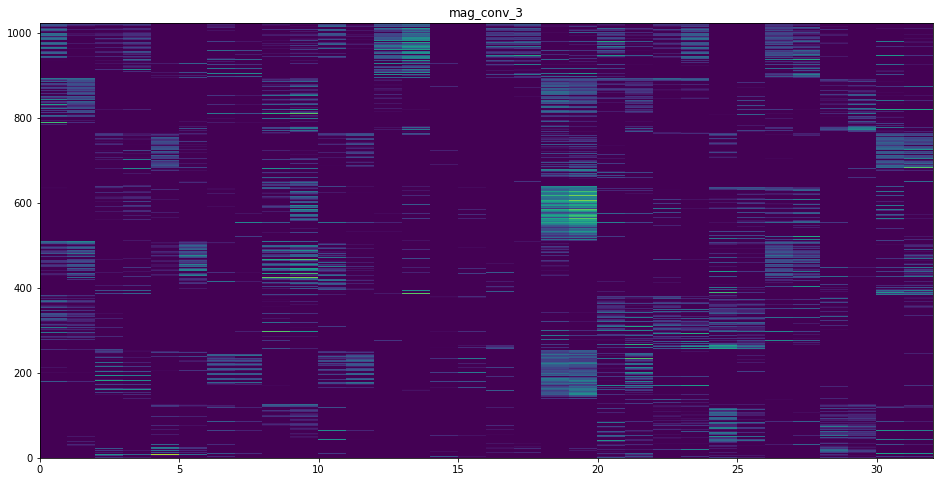

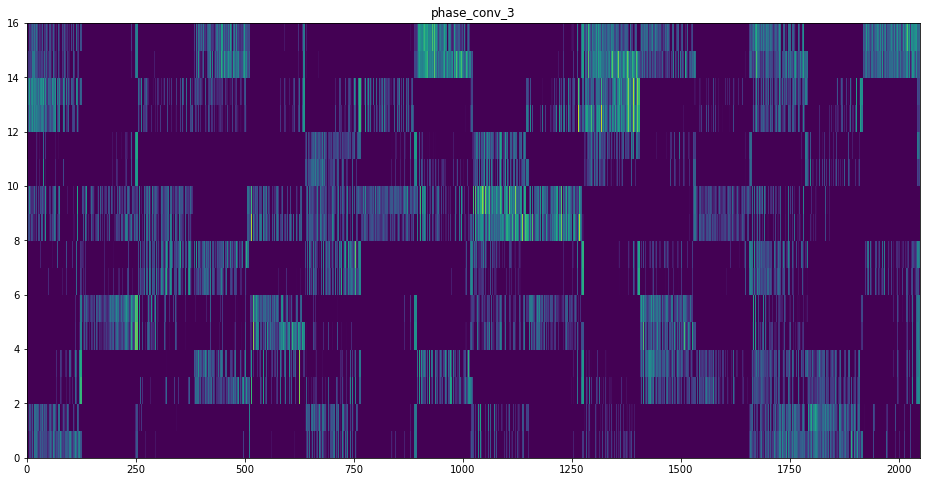

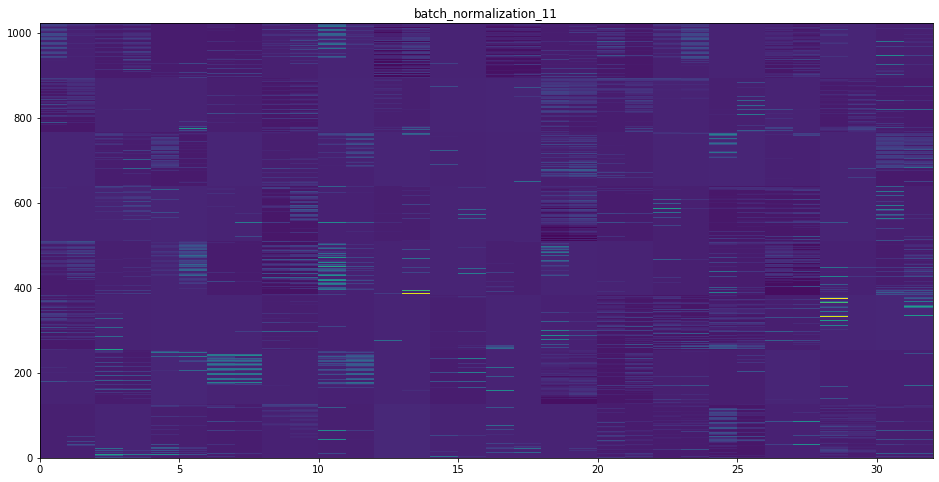

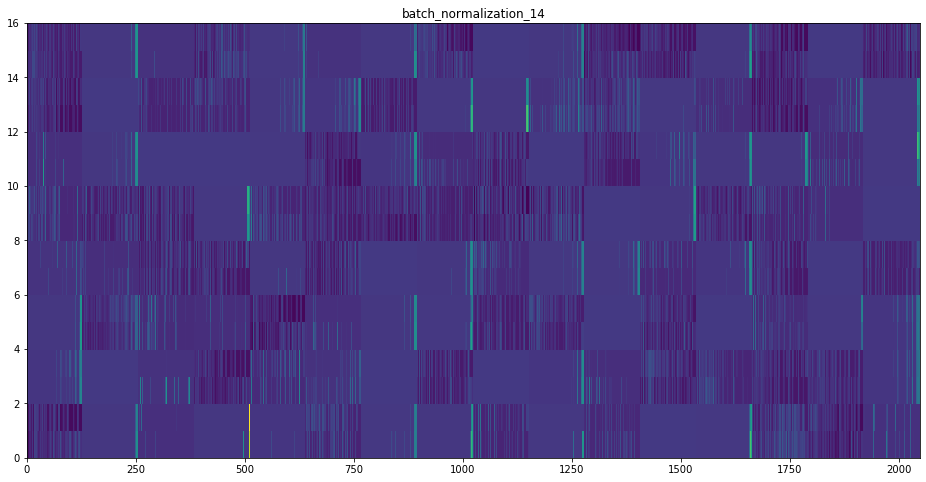

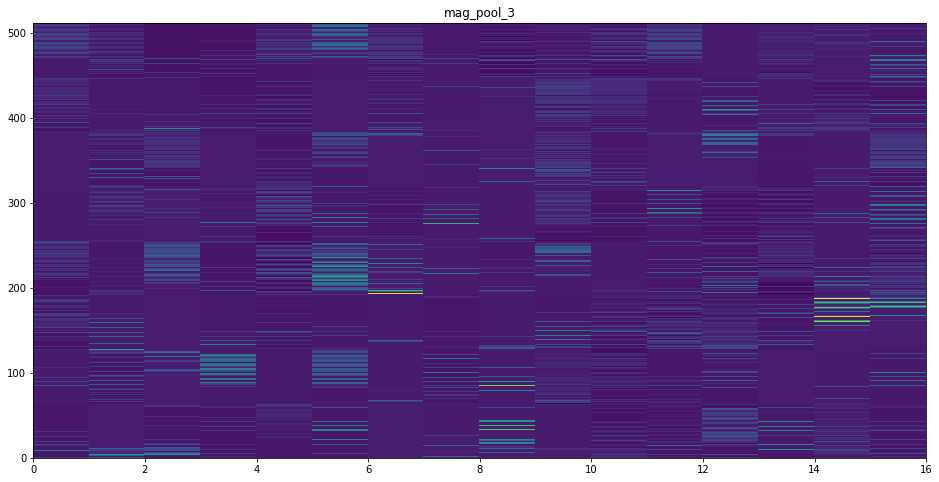

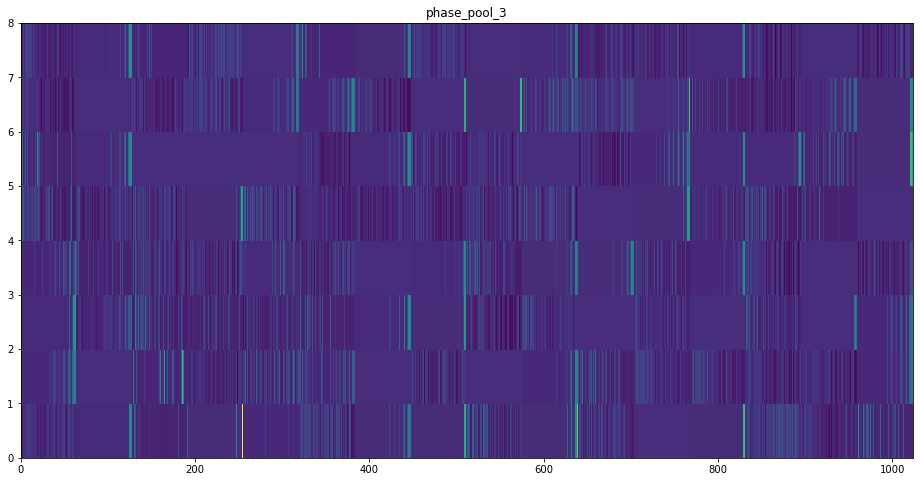

In [86]:
from keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.compat.v1.keras.Model(inputs=model.inputs, outputs=layer_outputs)

activations = activation_model.predict([prod_samples.tunings[0], prod_samples.mags[0].reshape(1, rows, cols), prod_samples.phases[0].reshape(1, rows, cols)]) 

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  n_cols = n_features // images_per_row
  print("%s:" % layer_name, n_features, layer_activation.shape)
  if len(layer_activation.shape) < 4:
    continue

  if n_cols == 0:
    continue

  col_size = layer_activation.shape[1]
  row_size = layer_activation.shape[2]

  display_grid = np.zeros((col_size * n_cols, images_per_row * row_size))

  for col in range(n_cols):
      for row in range(images_per_row):
          channel_image = layer_activation[0, :, :, col * images_per_row + row]
          display_grid[col * col_size : (col + 1) * col_size, row * row_size : (row + 1) * row_size] = channel_image
    
  col_scale =1. / col_size
  row_scale =1. / row_size

  plt.figure(figsize=(row_scale * display_grid.shape[1], col_scale * display_grid.shape[0]))
  
  plt.title(layer_name)
  plt.grid(False)
  plt.pcolormesh(display_grid)

# Save Models

In [ ]:
# Auth this runtime to GCP (once only)
from google.colab import auth
auth.authenticate_user()

In [121]:
model.save("deepchords_model_v1.h5")
!ls -lh *.h5

-rw-r--r-- 1 jupyter jupyter 365M Mar 16 18:54 deepchords_model_v1.h5


In [122]:
!gsutil -m cp -a public-read *.h5 gs://muthanna.com/deepears

Copying file://deepchords_model_v1.h5 [Content-Type=application/octet-stream]...
\ [1/1 files][364.4 MiB/364.4 MiB] 100% Done                                    
Operation completed over 1 objects/364.4 MiB.                                    


In [127]:
old_model = model
new_model = tf.keras.models.load_model("deepchords_model_v1.h5")

In [128]:
model = new_model

# Live Test

In [124]:
!wget --no-check-certificate https://muthanna.com/deepears/sweetchild.wav

--2020-03-16 18:55:34--  https://muthanna.com/deepears/sweetchild.wav
Resolving muthanna.com (muthanna.com)... 35.244.227.152
Connecting to muthanna.com (muthanna.com)|35.244.227.152|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-03-16 18:55:35 ERROR 404: Not Found.



In [ ]:
fs, data = wavfile.read('sweetchild-8bit.wav')
sample_len = int(8000 * 0.33) # 0.33ms slice of 8khz audio
num_samples = int(len(data) / sample_len)
remainder = len(data) % sample_len

samples = np.reshape(data[0:len(data) - remainder], (num_samples, sample_len))

In [ ]:
for i in range(0, num_samples):
  f, t, Sxx = signal.spectrogram(samples[i], fs, window=('hann'), nperseg=64, nfft=128, noverlap=16, mode='magnitude')
  Sxx = Sxx.reshape(1, 65, 54,1)
  root_class = deepears.root_model.predict_classes(Sxx)
  chord_class = deepears.chord_model.predict_classes(Sxx)
  
  chord = deepears.get_chord_classes()[int(chord_class)]
  root = deepears.get_root_classes()[int(root_class)]
  print(i * 0.33, "seconds:", root, chord)


0.0 seconds: Cs min7
0.33 seconds: Cs dom7
0.66 seconds: D dom7
0.99 seconds: As dom7
1.32 seconds: D dom7
1.6500000000000001 seconds: Fs dom7
1.98 seconds: Cs dom7
2.31 seconds: Fs min7
2.64 seconds: E maj7
2.97 seconds: D dom7
3.3000000000000003 seconds: F major
3.6300000000000003 seconds: D maj7
3.96 seconds: Cs min7
4.29 seconds: Fs sus2
4.62 seconds: Ds dom7
4.95 seconds: Ds dom7
5.28 seconds: Ds min7
5.61 seconds: Fs dom7
5.94 seconds: D dom7
6.2700000000000005 seconds: Cs dom7
6.6000000000000005 seconds: Cs dom7
6.930000000000001 seconds: D min7
7.260000000000001 seconds: Cs dom7
7.590000000000001 seconds: D dom7
7.92 seconds: Fs dom7
8.25 seconds: D dom7
8.58 seconds: G min7
8.91 seconds: Fs minor
9.24 seconds: D dom7
9.57 seconds: D dom7
9.9 seconds: B min7
10.23 seconds: Ds dom7
10.56 seconds: Fs dom7
10.89 seconds: Fs dom7
11.22 seconds: Cs dom7
11.55 seconds: C dom7
11.88 seconds: B maj7
12.21 seconds: Cs dom7
12.540000000000001 seconds: As dom7
12.870000000000001 seconds: 